Importing pandas library as pd, assigning csv file to variable d and getting its total length

In [1]:
import pandas as pd
d = pd.read_csv('student-por.csv',sep=';')
len(d)

649

Creating a column called 'pass' and summing the G1,G2,G3 if the total sum is greaterthan or equal to 35 
then the respective block will be assigned as '1' or else assigned as '0', and removing the [G1,G2,G3] from the file.

In [2]:
d['pass'] = d.apply(lambda row: 1 if (row["G1"]+row['G2']+row['G3']) >= 35 else 0, axis=1)
d = d.drop(['G1', 'G2', 'G3'], axis=1)
d.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,1


Applying get_dummies function from pandas, it will convert unique values into column heading.

In [3]:
d = pd.get_dummies(d, columns=['sex','school','address','famsize','Pstatus','Mjob','Fjob',
                               'reason',
                               'guardian','schoolsup','famsup','paid','activities','nursery',
                               'higher','internet','romantic'])
d.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


Dividing the data into two types the first 500 rows will be training sets and the last 149 rows will be test sets,
Removing the 'pass' column for training attribute and test attribute variable but assigning remaining columns
and calculating how many will pass

In [4]:
import numpy as np
d = d.sample(frac=1)
d_train = d[500:]
d_test = d[:500]
d_train_att = d_train.drop(['pass'], axis=1)
d_train_pass = d_train['pass']
d_test_att = d_test.drop(['pass'], axis=1)
d_test_pass = d_test['pass']
d_att =d.drop(['pass'],axis =1)
d_pass = d['pass']

print(f"Passing :{(np.sum(d_pass))} out of {len(d_pass)} Total percentage = {round(100*float(np.sum(d_pass))/len(d_pass),2)}")

Passing :328 out of 649 Total percentage = 50.54


Importing tree from sklearn, using DecisionTreeClassifier we are fitting d_train_att(training attributes) and d_train_pass that we assigned previously

In [5]:
from sklearn import tree
t =tree.DecisionTreeClassifier(criterion = 'entropy', max_depth =5)
t = t.fit(d_train_att, d_train_pass)

Using export_praphviz we can save visual text to dot format

In [6]:
#saving as word_document file
tree.export_graphviz(t, out_file="student-performance.dot", label="all",
                     impurity = False, proportion = True,
                    feature_names=list(d_train_att), class_names = ["fail", "pass"],
                    filled = True, rounded = True)

Using export_text function we can save it in txt format and visualize it

In [7]:
#visualizing in text format
text = tree.export_text(t)
print(text)

|--- feature_5 <= 0.50
|   |--- feature_23 <= 0.50
|   |   |--- feature_12 <= 3.00
|   |   |   |--- feature_4 <= 1.50
|   |   |   |   |--- feature_8 <= 4.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_8 >  4.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_4 >  1.50
|   |   |   |   |--- feature_8 <= 3.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_8 >  3.50
|   |   |   |   |   |--- class: 1
|   |   |--- feature_12 >  3.00
|   |   |   |--- feature_37 <= 0.50
|   |   |   |   |--- feature_17 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_17 >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_37 >  0.50
|   |   |   |   |--- class: 1
|   |--- feature_23 >  0.50
|   |   |--- feature_9 <= 1.50
|   |   |   |--- feature_7 <= 2.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_7 >  2.50
|   |   |   |   |--- feature_8 <= 2.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_8 >  2.50
| 

Using matplotlib and fixing the figure size we can visualize in box graph like structure

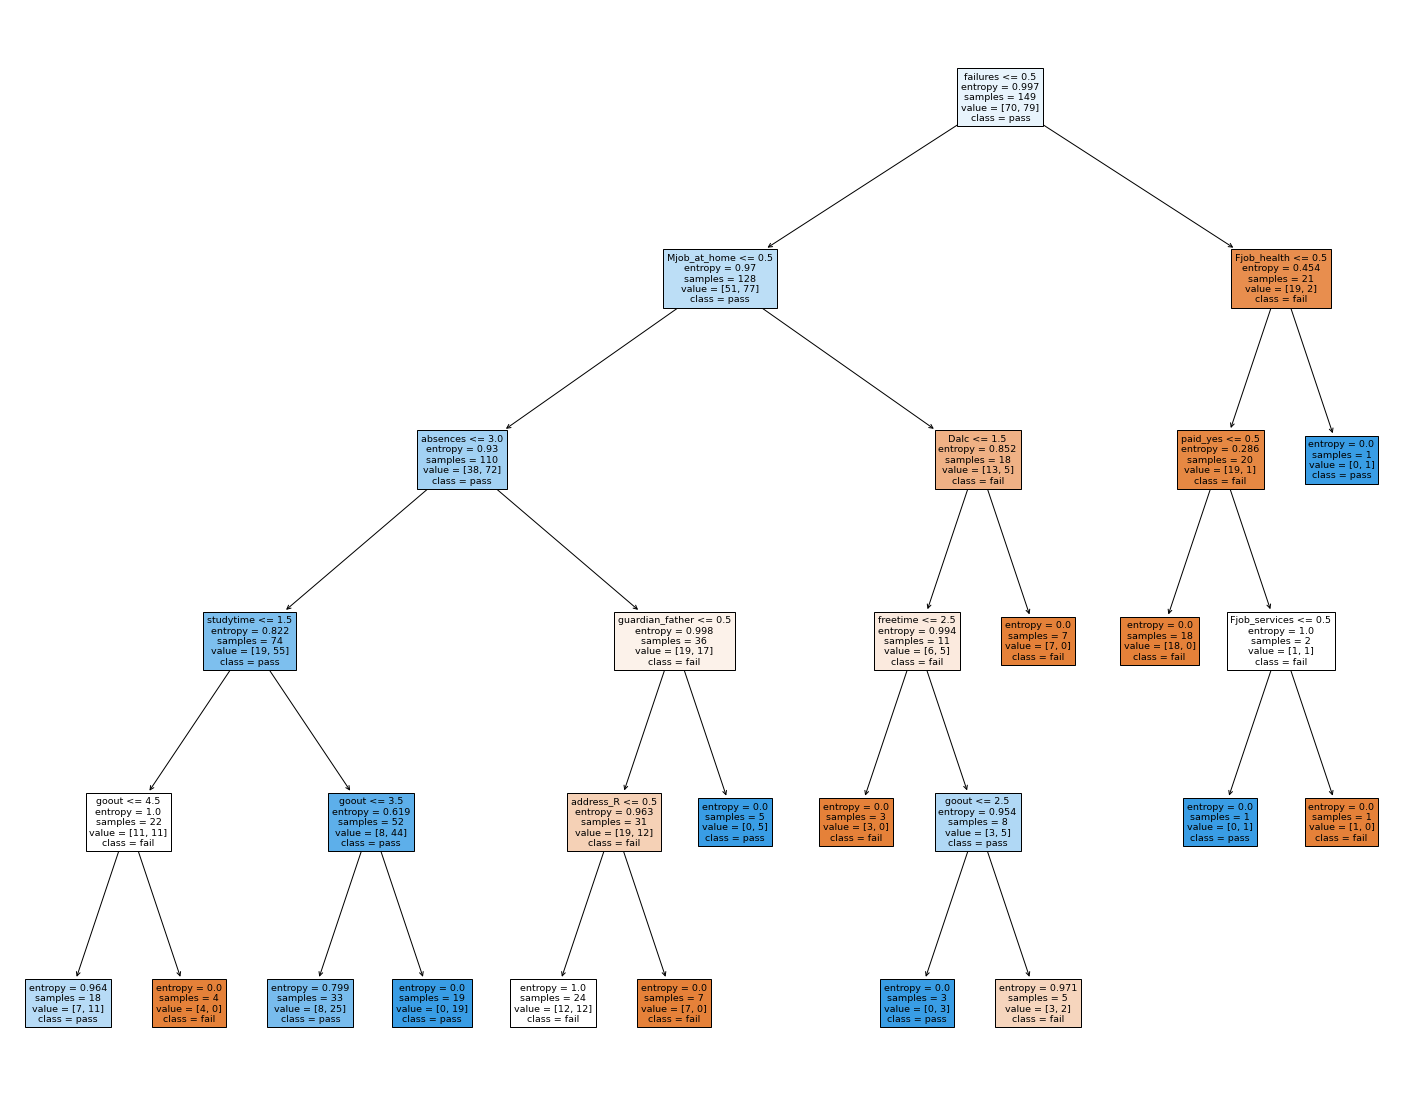

In [8]:
#visualizing with matplotlib
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(t,feature_names=list(d_train_att), class_names = ["fail", "pass"],
                   filled=True)

Using score function we can check the score of the tree

In [9]:
t.score(d_test_att,d_test_pass)

0.626

Performing cross_val_score will split sets into 80/20 bases, 20% on test sets and 80% on training sets and the average result is 68.

In [10]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(t, d_att,d_pass,cv = 5)
print(f"Accuracy: {round(scores.mean(),2)} , +/-{round(scores.std()*2,2)}")

Accuracy: 0.68 , +/-0.07


We use various max_depth values from 1 to 20 this will give us accuracy and calculations

In [11]:
for max_depth in range(1,20):
    t = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = max_depth)
    scores= cross_val_score(t,d_att,d_pass)
    print("Max depth: %d, Accuracy: %0.2f (+/- %0.2f)" % (max_depth, scores.mean(), scores.std()*2))

Max depth: 1, Accuracy: 0.64 (+/- 0.06)
Max depth: 2, Accuracy: 0.69 (+/- 0.06)
Max depth: 3, Accuracy: 0.70 (+/- 0.08)
Max depth: 4, Accuracy: 0.69 (+/- 0.08)
Max depth: 5, Accuracy: 0.68 (+/- 0.07)
Max depth: 6, Accuracy: 0.67 (+/- 0.09)
Max depth: 7, Accuracy: 0.67 (+/- 0.10)
Max depth: 8, Accuracy: 0.66 (+/- 0.11)
Max depth: 9, Accuracy: 0.67 (+/- 0.12)
Max depth: 10, Accuracy: 0.66 (+/- 0.10)
Max depth: 11, Accuracy: 0.64 (+/- 0.12)
Max depth: 12, Accuracy: 0.64 (+/- 0.12)
Max depth: 13, Accuracy: 0.64 (+/- 0.11)
Max depth: 14, Accuracy: 0.64 (+/- 0.15)
Max depth: 15, Accuracy: 0.64 (+/- 0.12)
Max depth: 16, Accuracy: 0.65 (+/- 0.11)
Max depth: 17, Accuracy: 0.63 (+/- 0.12)
Max depth: 18, Accuracy: 0.62 (+/- 0.13)
Max depth: 19, Accuracy: 0.65 (+/- 0.12)


Here we are creating an empty array of 19 rows and 3 columns and we assigning max_depth to first column, scores.mean() to 2nd column, scores.std()*2 to 3rd column and then printing it. 
each row value slightly varies based on max_depth vales from 1 to 20(the range)

In [12]:
depth_acc=np.empty((19,3), float)
i=0
for max_depth in range(1,20):
    t = tree.DecisionTreeClassifier(criterion = "entropy", max_depth=max_depth)
    scores = cross_val_score(t,d_att,d_pass,cv=5)
    depth_acc[i,0]=max_depth
    depth_acc[i,1]=scores.mean()
    depth_acc[i,2]=scores.std()*2
    i+=1
depth_acc

array([[ 1.        ,  0.63787716,  0.06216405],
       [ 2.        ,  0.68561717,  0.06447882],
       [ 3.        ,  0.69943948,  0.07659489],
       [ 4.        ,  0.69490757,  0.07200427],
       [ 5.        ,  0.68404293,  0.07452256],
       [ 6.        ,  0.67323792,  0.08027321],
       [ 7.        ,  0.67168754,  0.08888748],
       [ 8.        ,  0.66240906,  0.1202646 ],
       [ 9.        ,  0.65933214,  0.10551552],
       [10.        ,  0.65319022,  0.0955018 ],
       [11.        ,  0.66084675,  0.13530607],
       [12.        ,  0.6377579 ,  0.13075006],
       [13.        ,  0.62236136,  0.11479967],
       [14.        ,  0.63620751,  0.14609392],
       [15.        ,  0.6439356 ,  0.12990673],
       [16.        ,  0.64545021,  0.1191804 ],
       [17.        ,  0.63625522,  0.139414  ],
       [18.        ,  0.63933214,  0.09606171],
       [19.        ,  0.6177579 ,  0.13411393]])

ploting graph with matplotlib

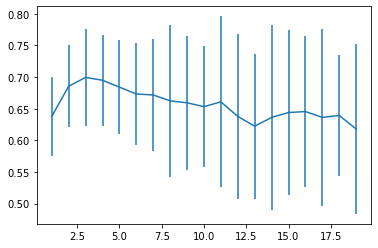

In [13]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
ax.errorbar(depth_acc[:,0],depth_acc[:,1],yerr=depth_acc[:,2])
plt.show()